In [303]:
####################### DSI Instructor Task: Part 1 #######################

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
#from sklearn.feature_selection import SelectKBest, chi2
#from sklearn.decomposition import NMF
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [284]:
df = pd.read_csv('C:/Users/Rajesh/Desktop/GA_data/breast-cancer.csv', header=None, names=['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst'])
df=df.set_index('ID')
df.isnull().any().any() #no NAs
np.mean(df)
df.median(axis=0)
df.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [285]:
df.groupby(df.diagnosis)['smoothness_mean'].mean()

diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64

In [286]:
df.groupby(df.diagnosis)['compactness_mean'].mean()

diagnosis
B    0.021438
M    0.032281
Name: compactness_mean, dtype: float64

In [287]:
df.groupby(df.diagnosis)['smoothness_mean'].median()

diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64

In [288]:
df.groupby(df.diagnosis)['compactness_mean'].median()

diagnosis
B    0.01631
M    0.02859
Name: compactness_mean, dtype: float64

In [289]:
#If this is a Normal Distribution, we can assume that the 'Medians' for the Smoothness and Compactness are the same as 'Means'

In [290]:
#df.loc[:,'Cm1']=df.loc[:,'compactness_mean']+df.loc[:,'compactness_sd_error']
#df.loc[:,'Cm2']=df.loc[:,'compactness_mean']-df.loc[:,'compactness_sd_error']
#df.loc[:,'Sm1']=df.loc[:,'smoothness_mean']+df.loc[:,'smoothness_sd_error']
#df.loc[:,'Sm2']=df.loc[:,'smoothness_mean']-df.loc[:,'smoothness_sd_error']

In [ ]:
#For Compactness
#df.groupby(df.diagnosis)['Cm1'].mean()
#df.groupby(df.diagnosis)['Cm2'].mean()

#For Smoothness
#df.groupby(df.diagnosis)['Sm1'].mean()
#df.groupby(df.diagnosis)['Sm2'].mean()

In [291]:
y = df.diagnosis
x = df.iloc[:,1:]
data=x
x = (x - x.mean()) / (x.std()) #Normalization

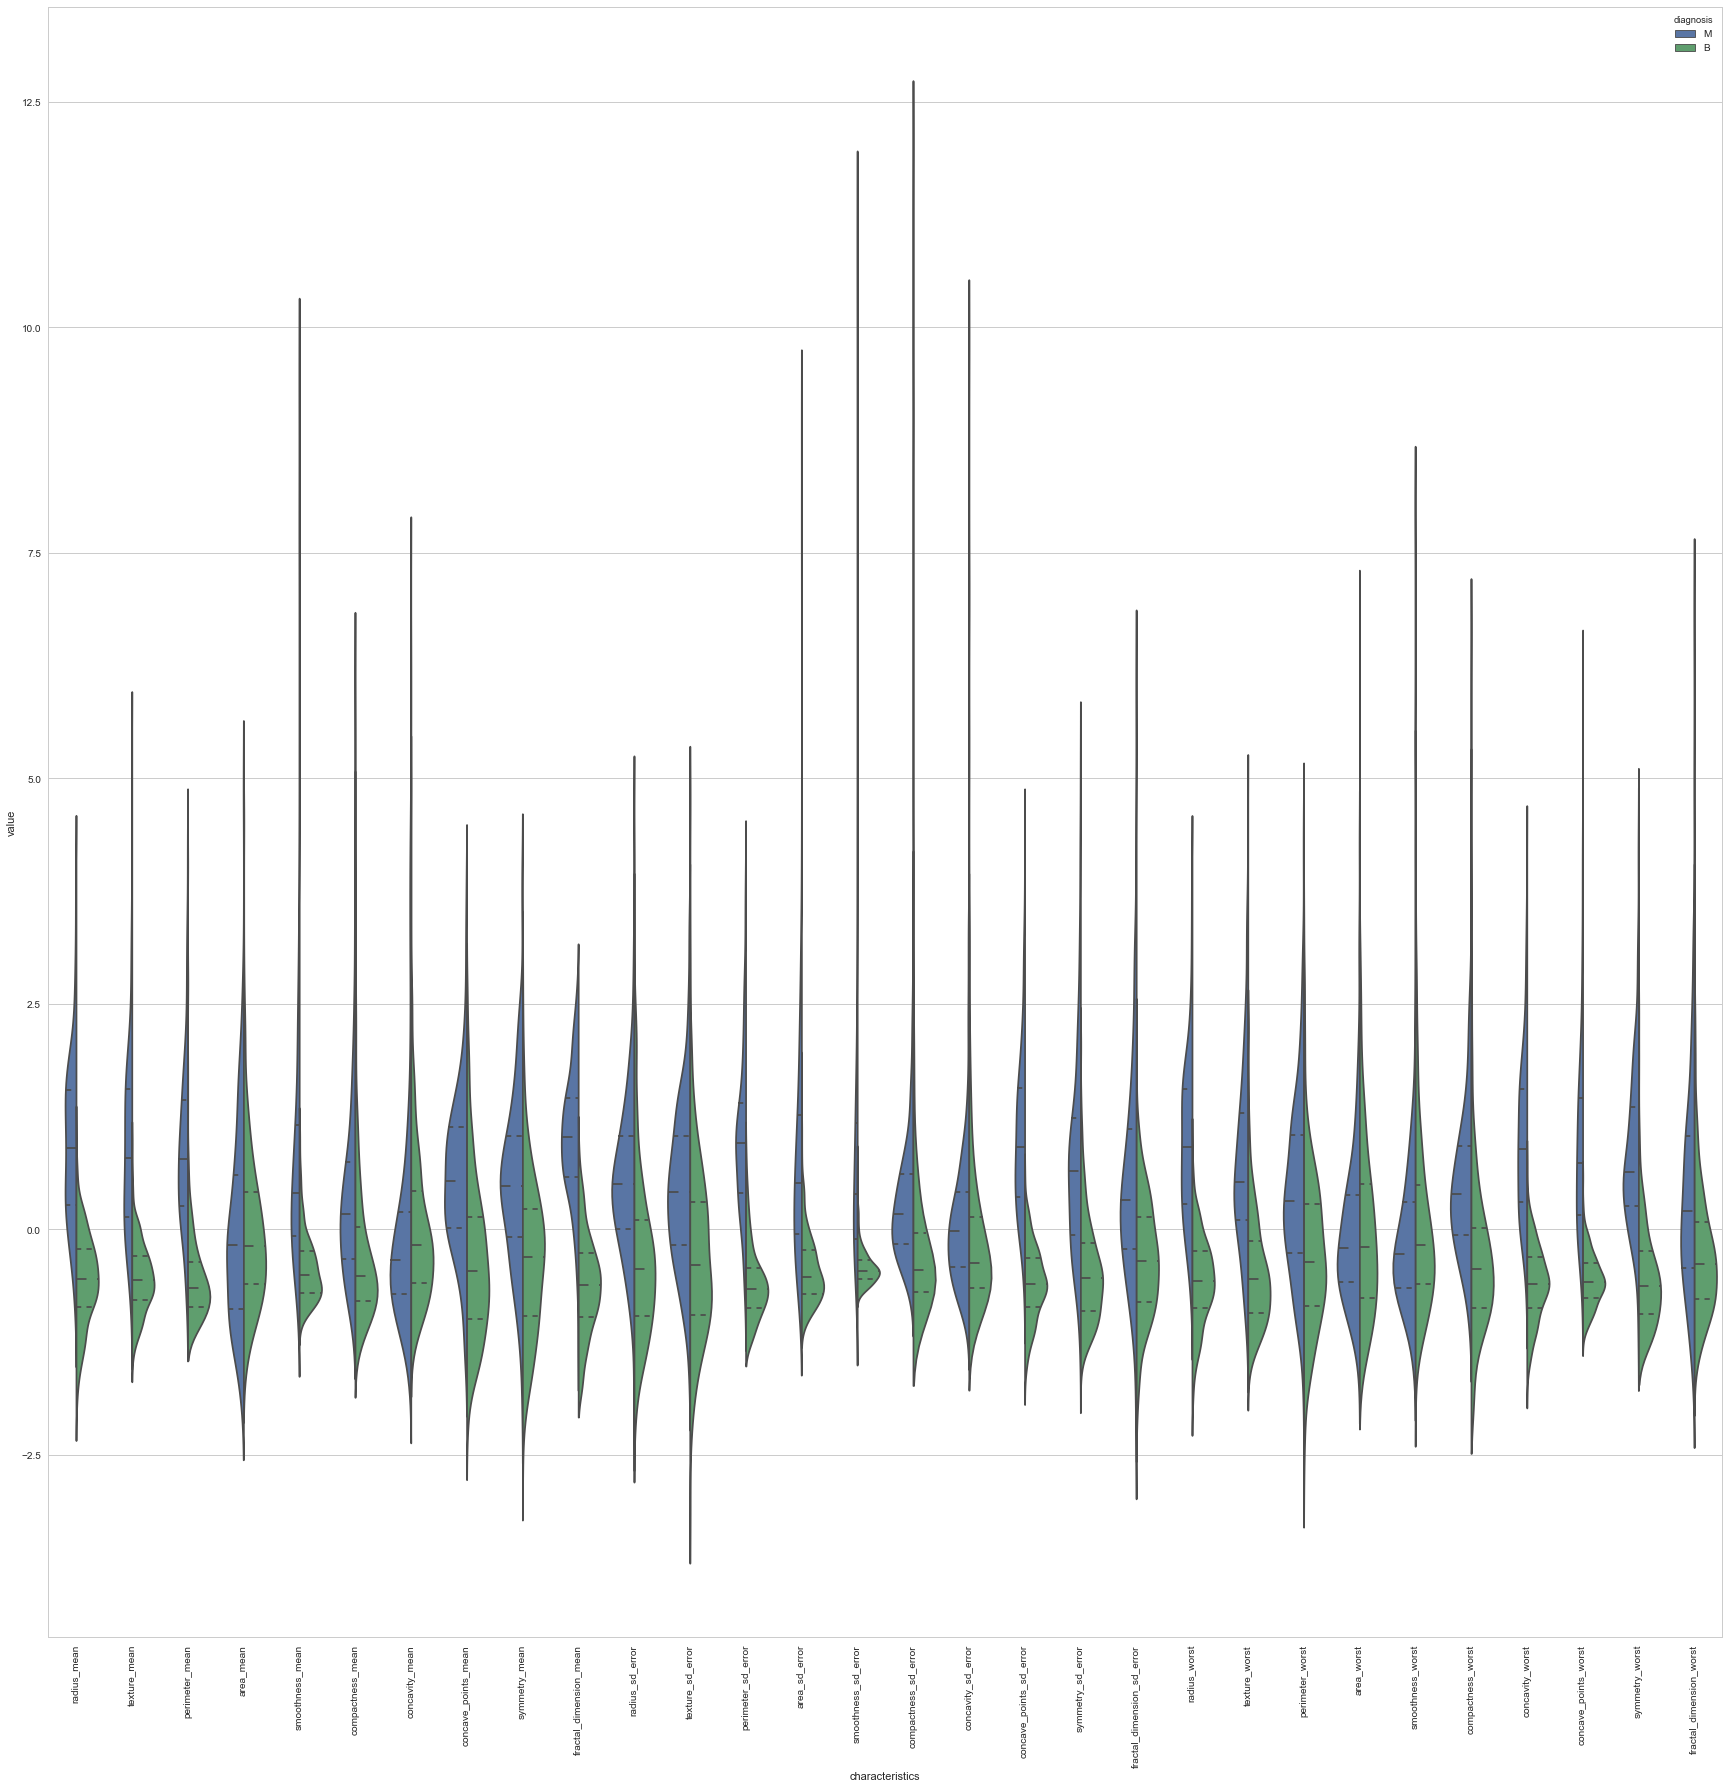

In [292]:
#Initial analysis

std_df = pd.concat([y,x.iloc[:,(0,3,6,9,12,15,18,21,24,27,1,4,7,10,13,16,19,22,25,28,2,5,8,11,14,17,20,23,26,29)]],axis=1)
std_df = pd.melt(std_df,id_vars="diagnosis",
                    var_name="characteristics",
                    value_name='value')
plt.figure(figsize=(30,30))
sns.violinplot(x="characteristics", y="value", hue="diagnosis", data=std_df,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

#The chart here shows the clear difference between the medians of some variables for malign and benign cancer.
#These variables seem to be potentially good candidates for classification. 
#In the mean category, apart from area mean and concavity mean, rest all seem to be well separated. Especially radius and fractal dimension mean.
#In the Std error, Perimeter, smoothness, and concave points std error seem to be good candidates.
#In the worst case category, concavity, concave points, and radius worst seem to be good indicators of potential candidates as well.


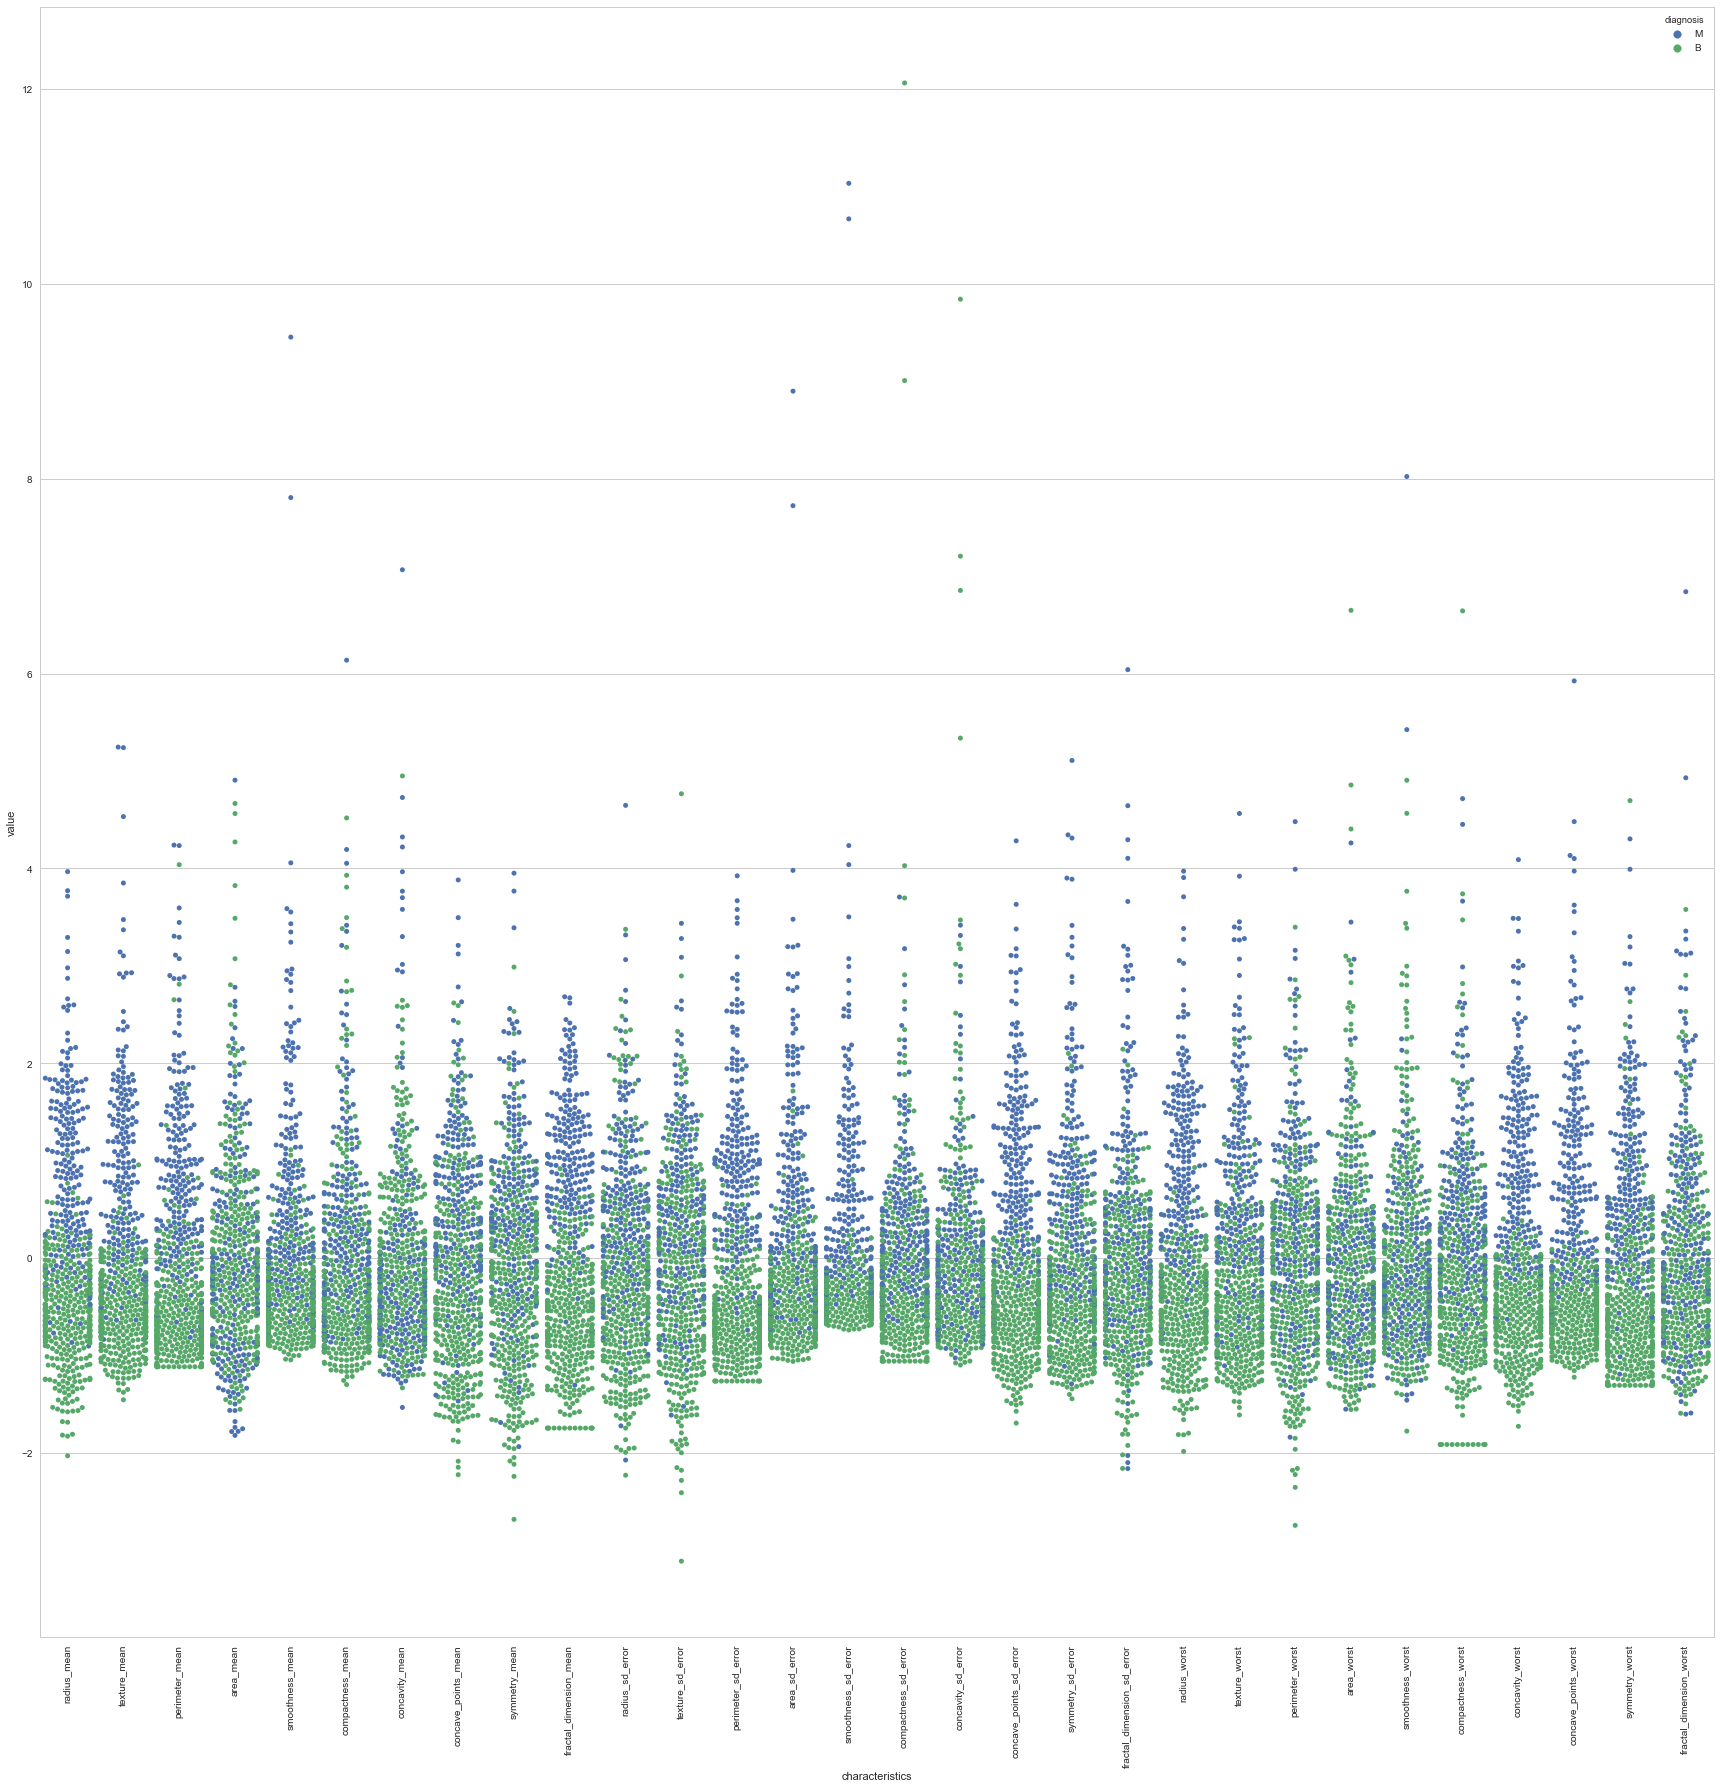

In [293]:
plt.figure(figsize=(30,30))
sns.swarmplot(x="characteristics", y="value", hue="diagnosis", data=std_df)
plt.xticks(rotation=90)
plt.show()

#This graph is another good indicator of variables that are well separated and can be good bet for classification, upon selection.
#We can see the values for variables like concavity mean, area mean, area worst and smoothness worst, are evenly spread among Benign and Malign cancer.
#Hence it would be difficult to find an effective predictor in these variables for classification.

In [294]:
data=df
#Mathematically, trying to understand the relationship of the variables w.r.t the diagnosis factor.
#Running correlation analysis 'on a high level' to understand how suggestive/indicative are the variables of the cancer status.
data.diagnosis=data.diagnosis.astype('category') #making this a categorical variable
cat_columns = data.select_dtypes(['category']).columns 
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes) #making this an 'int' column to run correlation analysis

In [295]:
corr_values=data.corr().diagnosis #getting correlations w.r.t. diagnosis alone
abs(corr_values).sort_values(ascending=False)

#fractal_dimension_mean        0.793566
#concave_points_sd_error       0.782914
#perimeter_sd_error            0.776614
#concavity_worst               0.776454

#If we look at the top 4 correlated variables, all tend to repeat from our initial analysis (corroborating our initial intuitive guess).
#It is a simple and naive, but an effective method to get a rough idea on the dataset and the influence of different independent variables on the dependent one.
#This might be purely correlation, but again reiterating the same: This gives us a rough idea.

diagnosis                     1.000000
fractal_dimension_mean        0.793566
concave_points_sd_error       0.782914
perimeter_sd_error            0.776614
concavity_worst               0.776454
radius_worst                  0.742636
concave_points_worst          0.733825
radius_mean                   0.730029
texture_mean                  0.708984
perimeter_mean                0.696360
symmetry_worst                0.659610
texture_worst                 0.596534
symmetry_sd_error             0.590998
area_sd_error                 0.567134
smoothness_mean               0.556141
smoothness_sd_error           0.548236
concave_points_mean           0.456903
symmetry_mean                 0.421465
fractal_dimension_sd_error    0.416294
radius_sd_error               0.415185
compactness_worst             0.408042
texture_sd_error              0.358560
perimeter_worst               0.330499
fractal_dimension_worst       0.323872
compactness_mean              0.292999
compactness_sd_error     

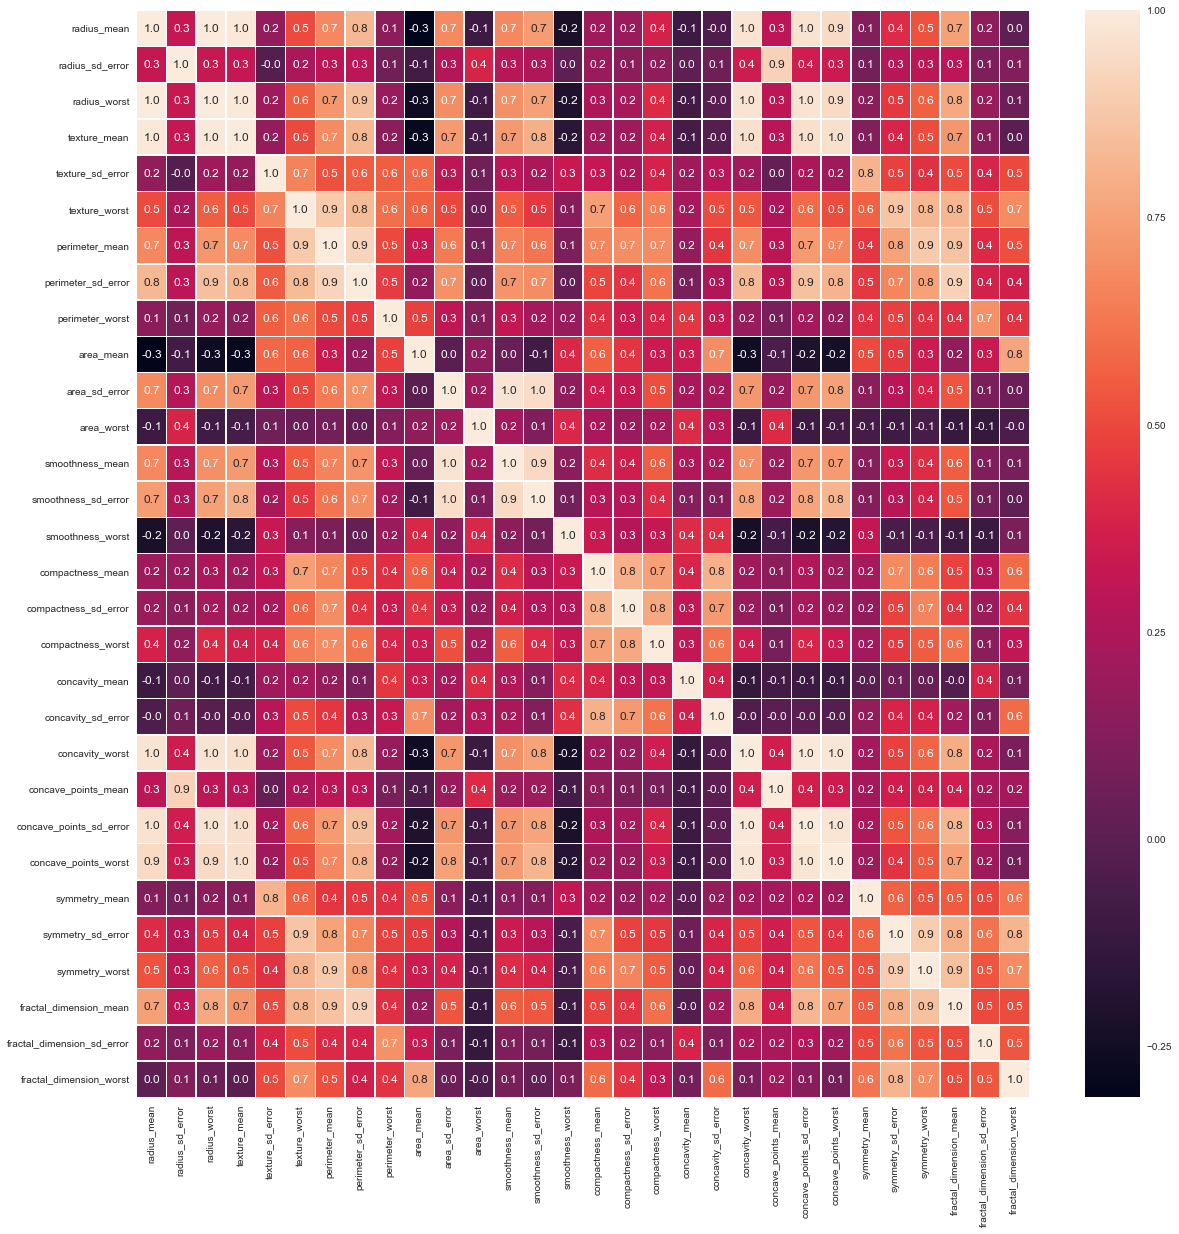

In [298]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
#Concavity worst , concave points worst and concave points sd error are correlated - select concave points worst
#texture mean and radius mean, radius worst are correlated - select radius mean
#Concave points worst and radius mean are correlated -select radius mean

#area sd error, smoothness mean and smoothness sd error are correlated - select smoothness mean
#symmetry worst, symmetry sd error and fractal dimension mean are correlated - select fractal dimension mean
#perimeter sd error and perimeter mean are correlated - select perimeter sd error

In [ ]:
#Even though we can perform our analysis with selective variables (handpicking and eliminating the variables, as decided from the above intuition).
#We will go with our analysis using the entire dataset which is Normalized. 
#We will apply techniques for dimension reduction and feature selection to proceed with our analysis, like PCA.
#We will try to understand the effect of dimension reduction on the interpretability of models.

In [300]:
#Bootstrap Function

import numpy.random as npr

def bootstrap(data, num_samples,statistic):
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = statistic(samples, axis=1)
    return (samples,stat)

data = np.array([1, 2, 3, 1000, 5])
sample_set, means = bootstrap(data, 100000, np.mean)

In [301]:
sample_set

array([[   3, 1000,    1,    1,    5],
       [   2,    2,    2,    5, 1000],
       [   1,    5,    1,    1,    3],
       ..., 
       [   2,    2,    1, 1000,    2],
       [1000,    5,    3,    1, 1000],
       [   3,    1,    2,    2,    1]])

In [302]:
means

array([ 202. ,  202.2,    2.2, ...,  201.4,  401.8,    1.8])

In [ ]:
#We won't bootstrap the samples here for our analysis,as it will consume a lot of time. 
#We would like to try a lot of things, which we would essentially like to do in a relatively smaller sample of dataset - like the one provided.
#But if we want to resample the data to a larger size and perform our analyses, this is how we have to proceed! 
#Larger the sample, safer the bet and less chances for overfitting.

In [299]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [231]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', SVC(random_state=1, kernel='rbf'))
])

In [232]:


N_FEATURES_OPTIONS = range(4,20)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': param_range,
        'classify__gamma': param_range
    }
]


In [233]:
grid = GridSearchCV(pipe, cv=10, n_jobs=-1, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'classify__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'reduce_dim': [PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)], 'classify__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'reduce_dim__n_components': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [234]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores.shape

(1024L,)

In [235]:
mean_scores = mean_scores.reshape(len(param_range),len(param_range), -1, len(N_FEATURES_OPTIONS))

In [236]:
mean_scores.shape

(8L, 8L, 1L, 16L)

In [237]:
mean_scores = mean_scores.max(axis=0)
mean_scores = mean_scores.max(axis=0)

In [238]:
mean_scores

array([[ 0.96984925,  0.97738693,  0.97487437,  0.97236181,  0.97236181,
         0.98241206,  0.98492462,  0.98492462,  0.98241206,  0.9798995 ,
         0.98241206,  0.98241206,  0.98241206,  0.98241206,  0.98241206,
         0.98241206]])

In [239]:
grid.best_score_ #direct command
#See, that's how we got the best score - From the max score of previous cell's array!

0.98492462311557794

In [240]:
grid.best_params_

{'classify__C': 10.0,
 'classify__gamma': 0.01,
 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'reduce_dim__n_components': 10}

In [242]:
#Use best parameters
clf_svc = grid.best_estimator_
clf_svc.fit(X_train, y_train)

In [244]:
print("Test score")
clf_svc.score(X_test, y_test)

Test score


0.98245614035087714

In [ ]:
#We cannot interpret the results when performing PCA analysis, as the dimensions are reduced into components. 
#The individual dimensions lose their interpretability, but we can only predict better with new dataset coming in for test.

In [200]:
#Without PCA
#SVM Classifier



parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.0001],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("------------------------------------")
    print("")
    clf_svc_direct = GridSearchCV(SVC(random_state=0), parameters, cv=10, scoring='%s_macro' % score)
    clf_svc_direct.fit(X_train, y_train)
    print("Best Params")
    print(clf_svc_direct.best_params_)
    print("")
    #print("Coefficients")
    #print(clf_svc_direct.best_estimator_.coef_)
    #print("")
    #print("Intercept")
    #print(clf_svc_direct.best_estimator_.intercept_)
    #print("")
    y_pred = clf_svc_direct.predict(X_test)
    print(classification_report(y_test, y_pred))
    
#Coefficients and Intercepts for Interpretability can only be viewed if the finalized model uses Linear kernel. 
#Hence the commented lines


# Tuning hyper-parameters for precision
------------------------------------

Best Params
{'kernel': 'rbf', 'C': 100, 'gamma': 0.001}

             precision    recall  f1-score   support

          B       0.99      0.98      0.99       108
          M       0.97      0.98      0.98        63

avg / total       0.98      0.98      0.98       171

# Tuning hyper-parameters for recall
------------------------------------

Best Params
{'kernel': 'rbf', 'C': 100, 'gamma': 0.001}

             precision    recall  f1-score   support

          B       0.99      0.98      0.99       108
          M       0.97      0.98      0.98        63

avg / total       0.98      0.98      0.98       171



In [221]:
#Just using Linear Kernel--
#For the sake of interpretability

parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['recall','precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("------------------------------------")
    print("")
    clf_svc_direct = GridSearchCV(SVC(random_state=0), parameters, cv=10, scoring='%s_macro' % score)
    clf_svc_direct.fit(X_train, y_train)
    print("Best Params")
    print(clf_svc_direct.best_params_)
    print("")
    print("Coefficients")
    print(clf_svc_direct.best_estimator_.coef_)
    print("")
    print("Intercept")
    print(clf_svc_direct.best_estimator_.intercept_)
    print("")
    y_pred = clf_svc_direct.predict(X_test)
    print(classification_report(y_test, y_pred))
    

# Tuning hyper-parameters for recall
------------------------------------

Best Params
{'kernel': 'linear', 'C': 10}

Coefficients
[[-0.95825318 -0.21739173 -0.52813786 -0.09162716  0.1412775  -2.19862171
   0.43276241  1.56984954  0.7352642   0.14069108  2.03359223 -0.96343733
   1.19714612  1.89774106 -0.42985092 -1.26188573  0.37041655  2.10326044
   0.35988757 -2.77047353  1.54807362  1.9414314   1.07805584  1.99088835
   0.29299541 -0.64200445  2.21137174  0.11298105 -0.76275105  2.58952264]]

Intercept
[ 0.64568251]

             precision    recall  f1-score   support

          B       0.96      0.94      0.95       108
          M       0.89      0.94      0.91        63

avg / total       0.94      0.94      0.94       171

# Tuning hyper-parameters for precision
------------------------------------

Best Params
{'kernel': 'linear', 'C': 1}

Coefficients
[[ 0.1026668   0.249163    0.16447633  0.22436776 -0.12696527 -0.23939327
   0.32142161  0.3029087   0.39930711  0.12494152

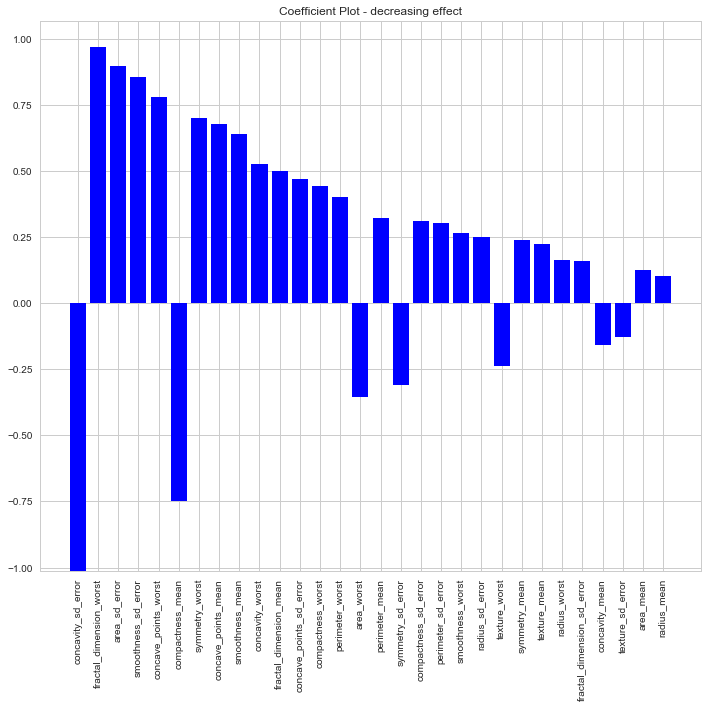

In [222]:
#Understanding coefficients
#We will use the resultant model selected by Precision score

sns.set(style='whitegrid')
labels=X_train.columns
coef=clf_svc_direct.best_estimator_.coef_
coef=coef[0,:]
index = np.argsort(abs(coef))[::-1]

plt.figure(figsize=(10,10))
plt.title('Coefficient Plot - decreasing effect')
plt.bar(range(X_train.shape[1]), coef[index], color='blue', align='center')
plt.xticks(range(X_train.shape[1]), labels[index], rotation = 90)
plt.tight_layout()
plt.show()

In [188]:
#We can see that concavity sd_error, fractal dimension worst and area sd error (to name a few) are influential towards Malignancy of the cancer. 
#Decrease in the concavity sd error gives sign of a more benign cancer. 
#fractal dimension worst increases the chance of a more malign cancer, with increase in its value. And so do the area sd error and smoothness sd error.

#Apart from the direction,the magnitude of the effect can be observed as well. 


In [213]:
#Without PCA
#RandomForest Classifier


parameters = {"max_depth": [5, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1.0, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("------------------------------------")
    print("")
    clf_rf_direct = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=100), parameters, cv=10, scoring='%s_macro' % score)
    clf_rf_direct.fit(X_train, y_train)
    print("Best Params")
    print(clf_rf_direct.best_params_)
    print("")
    y_pred = clf_rf_direct.predict(X_test)
    print(classification_report(y_test, y_pred))


# Tuning hyper-parameters for precision
------------------------------------

Best Params
{'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 1, 'max_depth': 5}

             precision    recall  f1-score   support

          B       0.95      0.96      0.96       108
          M       0.94      0.92      0.93        63

avg / total       0.95      0.95      0.95       171

# Tuning hyper-parameters for recall
------------------------------------

Best Params
{'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 3, 'max_depth': 5}

             precision    recall  f1-score   support

          B       0.96      0.96      0.96       108
          M       0.94      0.94      0.94        63

avg / total       0.95      0.95      0.95       171



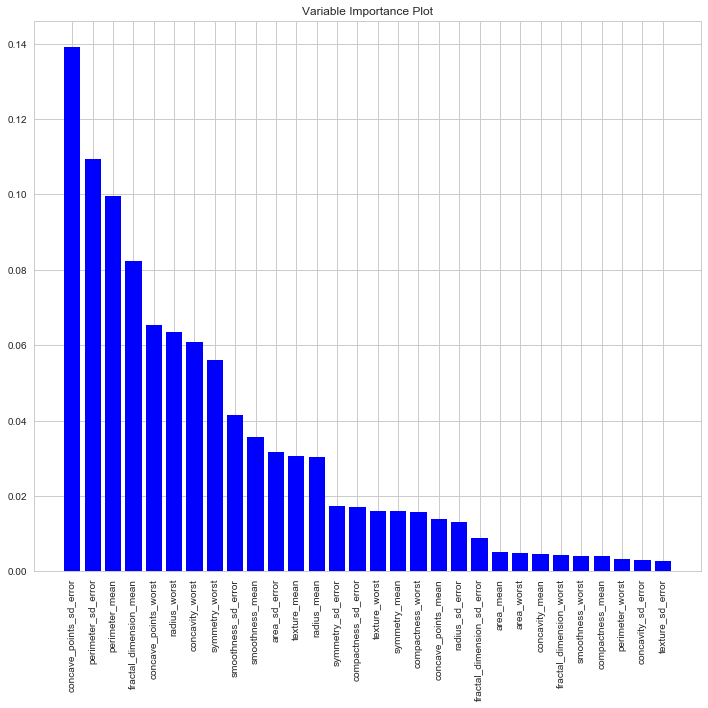

In [214]:
sns.set(style='whitegrid')
labels = X_train.columns
clf_rf = clf_rf_direct.best_estimator_
clf_rf.fit(X_train, y_train)

plt.figure(figsize=(10,10))
imp = clf_rf.feature_importances_
index = np.argsort(imp)[::-1]
plt.title('Variable Importance Plot')
plt.bar(range(X_train.shape[1]),
        imp[index],
        color='blue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           labels[index], rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
#The importance of each variable can be observed from this plot - Interpretability.
#We get an idea of the influence of a particular variable on the end result - Cancer Status.
#We cannot guess the direction of variable's effect, but can definitely judge the role of the same. 

In [264]:
#Without PCA
#Simple Logistic Regression Classifier


parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

scores = ['recall','precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("------------------------------------")
    print("")
    clf_lr_direct = GridSearchCV(LogisticRegression(random_state=0, penalty='l2'), parameters, cv=10, scoring='%s_macro' % score)
    clf_lr_direct.fit(X_train, y_train)
    print("Best Params")
    print(clf_lr_direct.best_params_)
    print("")
    print("Coefficients")
    print(clf_lr_direct.best_estimator_.coef_)
    print("")
    print("Intercept")
    print(clf_lr_direct.best_estimator_.intercept_)
    print("")
    y_pred = clf_lr_direct.predict(X_test)
    print(classification_report(y_test, y_pred))


# Tuning hyper-parameters for recall
------------------------------------

Best Params
{'C': 0.1}

Coefficients
[[ 0.32207468  0.36558167  0.31950219  0.33427161  0.15687812  0.04937164
   0.34789236  0.41095633  0.16027983 -0.13308138  0.52068424  0.00336827
   0.42396308  0.40702478 -0.07929602 -0.21992737 -0.03329871  0.08136126
  -0.08414231 -0.27319234  0.46254387  0.47464653  0.43677966  0.44280685
   0.33468027  0.15168514  0.38987111  0.50126667  0.32591328  0.18967121]]

Intercept
[-0.26020265]

             precision    recall  f1-score   support

          B       0.96      0.99      0.98       108
          M       0.98      0.94      0.96        63

avg / total       0.97      0.97      0.97       171

# Tuning hyper-parameters for precision
------------------------------------

Best Params
{'C': 1}

Coefficients
[[ 0.25883313  0.58845523  0.27456065  0.35241846  0.13380004 -0.41442825
   0.67252164  0.74179789  0.38012193 -0.03025861  1.35244414 -0.1408029
   0.91171354  

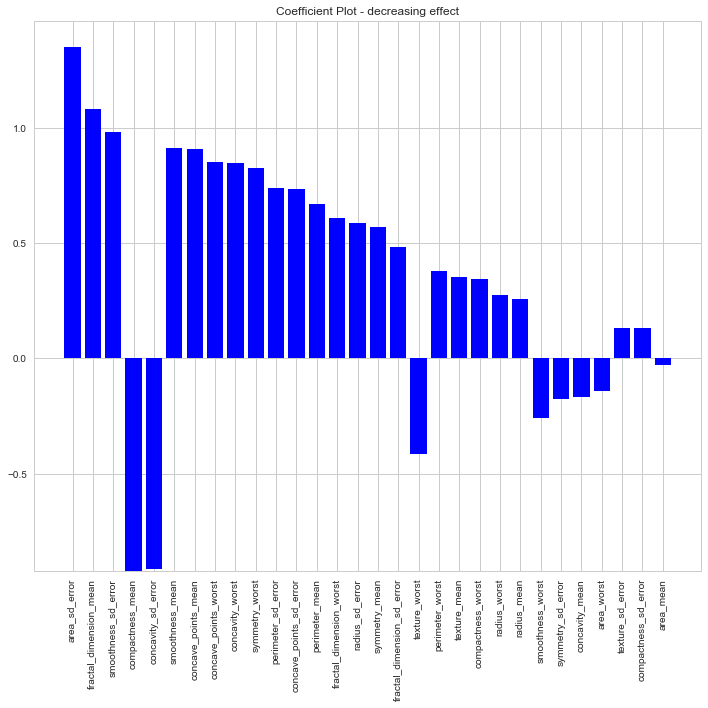

In [265]:
#Understanding coefficients

sns.set(style='whitegrid')
labels=X_train.columns
coef=clf_lr_direct.best_estimator_.coef_
coef=coef[0,:]
index = np.argsort(abs(coef))[::-1]

plt.figure(figsize=(10,10))
plt.title('Coefficient Plot - decreasing effect')
plt.bar(range(X_train.shape[1]), coef[index], color='blue', align='center')
plt.xticks(range(X_train.shape[1]), labels[index], rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
#Again the linaer model's coefficients give an idea on the effect of variables on the malignancy of the cancer. 
#The more the area sd error, fractal dimension mean and smoothness sd error - malignant is the cancer.
#Decrease in Compactness mean and concavity sd error causes the malignancy to moderate and we get more signs of bening cancer.


In [257]:
#Just to check once, the model accuracy using the 'hand-picked' dataset from the Data Exploration step.
#We will use Logistic Regression to measure the same

xhp=x.loc[:,('radius_mean', 'radius_sd_error', 'texture_sd_error', 'texture_worst', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_worst', 'smoothness_mean', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst')]
xhp.shape

(569, 20)

In [263]:
Xhp_train,Xhp_test,yhp_train,yhp_test = train_test_split(xhp,y, test_size=0.3, random_state=0)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

scores = ['recall','precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("------------------------------------")
    print("")
    clf_lr_direct_hp = GridSearchCV(LogisticRegression(random_state=0, penalty='l2'), parameters, cv=10, scoring='%s_macro' % score)
    clf_lr_direct_hp.fit(Xhp_train, yhp_train)
    print("Best Params")
    print(clf_lr_direct_hp.best_params_)
    print("")
    print("Coefficients")
    print(clf_lr_direct_hp.best_estimator_.coef_)
    print("")
    print("Intercept")
    print(clf_lr_direct_hp.best_estimator_.intercept_)
    print("")
    yhp_pred = clf_lr_direct_hp.predict(Xhp_test)
    print(classification_report(yhp_test, yhp_pred))


# Tuning hyper-parameters for recall
------------------------------------

Best Params
{'C': 10}

Coefficients
[[ 2.70798553  0.78145175 -0.03516802 -1.79143092  3.08683003  0.56583028
  -0.04371917 -0.35152125  5.42566384 -0.71127878 -2.16761161  2.51861798
  -0.21347293  0.16427033 -2.99398954  1.33067888  1.01292742  1.79798816
   0.21030403  2.43386103]]

Intercept
[-0.02577296]

             precision    recall  f1-score   support

          B       0.96      0.95      0.96       108
          M       0.92      0.94      0.93        63

avg / total       0.95      0.95      0.95       171

# Tuning hyper-parameters for precision
------------------------------------

Best Params
{'C': 10}

Coefficients
[[ 2.70798553  0.78145175 -0.03516802 -1.79143092  3.08683003  0.56583028
  -0.04371917 -0.35152125  5.42566384 -0.71127878 -2.16761161  2.51861798
  -0.21347293  0.16427033 -2.99398954  1.33067888  1.01292742  1.79798816
   0.21030403  2.43386103]]

Intercept
[-0.02577296]

        

In [ ]:
#We can see that interestingly, this is not doing much to the model and is only redcucing the performance. 
#Hence, after normalization, the choice of going with PCA for dimensionality reduction (or) with entire dataset works well.

In [282]:
#Model Comparison Summary:

#We started out with normalized data, which we utilized to fit different models. We used two sets of data - 1) entire dataset 2) handpicked data from the exploratory analysis, which was derived out of intuition.
#The models fitted out of entire dataset, in general, perform better than the ones fitted using the handpicked data - This may be attributed to proper utilization of all the information from the dataset, than to omit some.
#The SVM model was fit on the data with and without PCA - both performed equally good with a test-score of more than 98%.
#The SVM with rbf performed better than the linear kernel. Linear gave a test-score of 96% in return to the rbf kernel's 98%.
#The SVM models with PCA and rbf are non-interpretable, whereas the linear model isn't so. We can deduce the effect of features leading to the malignant/benign cancer. 
#The Random forest is an ensemble-tree model with good interpretability. The RF model gave a test-score of about 95%. 
#The variable importance plot gave inner insights into the different features and their effect on the malignancy of cancer.
#The simple logistic regression gave a test-score of 98%, which was one of the most effective models besides SVM. 
#The logistic model was interpretable as well, highlighting the influence of different features on cancer status. The coefficients were used to identify the magnitude & direction of the influence.


#Technical Audience-

#Although good with predictive power, the main limitation of the PCA analysis is its non-interpretability: the variables/features lose their individual properties after transforming into components corresponding to a fewer dimensions.
#Only linear models are interpretable: RBF and Tree based models can generally not be used for post analysis interpretation of variables.
#RandomForest in our study however has Variable Importance plots giving us an idea on the various features and their influence towards the Malignant Cancer.
#Apart from directional interpretation, the analysis covers the magnitude interpretation of variables, however with the normalized measures - On an average, how much increase/decrease in the magnitude of the normalized variable will cause the cancer to be malignant (Class - 1).
#The analysis did not scale the variables to a standard 0-1 range - This helps mostly in the analyses involving NeuralNets. [StandardScaler() in sklearn.preprocessing]
#The sample size is less - Can up-sample using bootstrap. Time constraints and increased training time for large samples called for analyses only on the given sample.
#Can go for more predictive power and use XGBoost and complex Deep Neural Networks in tensorflow.
#Can go for clustering algorithms like k-means to identify the cancer status.

#Non Technical Audience-

#The analysis invoved a supervised machine learning algorithm in SVM, a tree based ensemble model in Random Forest and a simple supervised statistical model in Logistic Regression to perform the classification problem.
#The SVM makes use of a technique where using an N-dimensional vector/dataframe, we are trying to separate the data points (using N-1) dimensional hyperplane. Ultimate aim is to separate the data points leading to benign and malign cancer.
#The Random forest is basically an ensemble (mixture) model of several tree models - a reason why it is called 'Forest'. The aim is to achieve a good bias-variance trade-off from that of the bagging and boosting methods. Random Forest selects only limited predictors every time to come up with multiple tree models (from different bags of dataset - with and without replacement, using the bootstrap option), which are ensembled in the end into a single model going by the votes of classification from each individual tree model.
#The Logistic regression is a linear algorithm which is used to estimate the probability of a binary response given the predictors, in the dataset. In our case, the features like area mean, perimeter worst, smoothness sd error, etc. The probability of the cancer being Malignant is obtained, which is later classified as is accordingly using a threshold (a probability bridge between the two classification factors - usually 0.5 in binary logistic regressions).
#PCA is a process which we use before applying the statistical / ML modelling techniques, to convert possibly correlated higher dimensions/variables into a set of linearly uncorrelated dimensions/variables called principal components, that are mostly preferred to be fewer in number.


#From most of the models we dealt with, the coefficients gave us a similar story. We shall use the story of logistic regression, as it is among the top performing linear and interpretable models we obtained today.

print("Intercept:")
print(clf_lr_direct.best_estimator_.intercept_)
print("")
print("Coefficients:")
print(coef[index])
print("")
print("Coefficient Labels:")
print(labels[index])

#According to the model, with every variable zero, the odds of the cancer being malignant is exp(-0.03457658) = 0.966. 
#Under ceteris paribus, for every unit increase in normalized value of area sd error, the odds of the cancer being malignant is exp(1.35244414) = 3.866.
#Under ceteris paribus, for every unit increase in normalized value of fractal dimension mean, the odds of the cancer being malignant is exp(1.08217847) = 2.951.
#Under ceteris paribus, for every unit increase in normalized value of smoothness sd error, the odds of the cancer being malignant is exp(0.98380943) = 2.675.
#Under ceteris paribus, for every unit increase in normalized value of compactness mean, the odds of the cancer being malignant is exp(-0.92408151) = 0.396.
#Under ceteris paribus, for every unit increase in normalized value of concavity sd error, the odds of the cancer being malignant is exp(-0.91275528) = 0.401.

Intercept:
[-0.03457658]

Coefficients:
[ 1.35244414  1.08217847  0.98380943 -0.92408151 -0.91275528  0.91171354
  0.91060617  0.85141981  0.84788462  0.82598448  0.74179789  0.73626543
  0.67252164  0.60803559  0.58845523  0.56885783  0.48503727 -0.41442825
  0.38012193  0.35241846  0.34662939  0.27456065  0.25883313 -0.25777111
 -0.17657033 -0.16818535 -0.1408029   0.13380004  0.13316407 -0.03025861]

Coefficient Labels:
Index([u'area_sd_error', u'fractal_dimension_mean', u'smoothness_sd_error',
       u'compactness_mean', u'concavity_sd_error', u'smoothness_mean',
       u'concave_points_mean', u'concave_points_worst', u'concavity_worst',
       u'symmetry_worst', u'perimeter_sd_error', u'concave_points_sd_error',
       u'perimeter_mean', u'fractal_dimension_worst', u'radius_sd_error',
       u'symmetry_mean', u'fractal_dimension_sd_error', u'texture_worst',
       u'perimeter_worst', u'texture_mean', u'compactness_worst',
       u'radius_worst', u'radius_mean', u'smoothness_worst'

In [ ]:
######################### CHALLENGE 2 ###########################
######################### DSI Instructor Task: Part 2 #########################

In [ ]:
#R Submission - 1

#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression #R It should be under sklearn.linear_model
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv') #R make the dataframe's name 'data', as used below
#R Better to set the 'Id' column as the index.

# Setup data for prediction
x1 = data.SalaryNormalized 
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression() #R We can use more powerful linear models, depending upon the performance of this model with the test data
#R Better to use random_state, to reproduce the results.
#R I can see below that the model is being fit with x2 and x1. I would suggest take more independent variables to fit the model.

#R It is not advised to fit a linear model to predict a continuous dependent variable (x1) using only categorical/dummy independent variables (x2.full_time & x2.part_time).

# Evaluate model
from sklearn.cross_validation import cross_val_score #R need not import again
from sklearn.cross_validation import train_test_split #R not utilized the functionality
#R X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) 
#R Instead of X and y, use the finalized dependent and independent variables. The test_size and random_state can be of your choice.
#R In this case for ex: x2_train, x2_test, x1_train, x1_test = train_test_split(x2, x1, test_size=0.5, random_state=0)

scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') 
#R no use of CV when the folds are just 1. Use CV of 3 or 10 - It is proven that 10 works well almost every time.
#R And reiterating from the earlier point, it is not advised to use binary variables alone as independent variables in a Linear Regression against a continuous dependent variable.
#R Safe to change the scoring metric to 'neg_mean_absolute_error' as well.

print(scores.mean())
#R This would be the training (entire data) CV score. 
#R Could have performed train_test_split earlier to get a better idea of the model fit on a test dataset as well. 

#R It is advised to run a GridSearchCV with Linear Regression or a pipeline of many linear models to get the best model out of the given parameters.
#R We can get the best score and the best model (with best estimator), using which we can get the test score as well (using .score(x2_test,x1_test)).


In [ ]:
#R Submission - 2
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')
#R Better to set the 'Id' column as the index.


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()
#R Better to use random_state, to reproduce the results.

#R We can use more powerful linear models, depending upon the performance of this model with the test data

#R I can see below that the model is being fit with X and y. I would suggest take more independent variables to fit the model.

#R It is not advised to fit a linear model to predict a continuous dependent variable (y) using only categorical/dummy independent variables (X.full_time & X.part_time).


# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
#R From earlier point, it is not advised to use binary variables alone as independent variables in a Linear Regression against a continuous dependent variable.
#R Safe to change the scoring metric to 'neg_mean_absolute_error'.

print(scores.mean())
#R This would be the training (entire data) CV score. 
#R Could have performed train_test_split earlier to get a better idea of the model fit on a test dataset as well. 

#R It is advised to run a GridSearchCV with Linear Regression or a pipeline of many linear models to get the best model out of the given parameters.
#R We can get the best score and the best model (with best estimator), using which we can get the test score as well (using .score(X_test,y_test)).
